In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.api

In [4]:
df_sales = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Product%20Sales%20Data.csv")

In [5]:
df_sales

,Month,Cream,Detergent,Moisturizer,Sanitizer,Shampoo,Soap,Total Units,Total Profit
0,Jan,5100,9600,1525,1550,1200,2510,21485,211500
1,Feb,5000,6500,1225,1250,2100,2640,18715,183800
2,Mar,4450,9950,1365,1390,3550,2150,22855,225200
3,Apr,5770,9270,1155,1180,1870,3410,22655,223200
4,May,4460,8160,1765,1790,1560,3610,21345,210100
5,Jun,4790,7890,1580,1605,1890,2770,20525,201900
6,Jul,4680,9380,1145,1170,1780,2990,21145,296000
7,Aug,5760,10360,1425,1450,2860,3710,25565,361900
8,Sep,6000,8500,1805,1830,2100,3550,23785,234500
9,Oct,8200,10700,1915,1940,2300,2000,27055,267200


In [6]:
df_sales.describe()

,Cream,Detergent,Moisturizer,Sanitizer,Shampoo,Soap,Total Units,Total Profit
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5725.833333,9900.833333,1567.916667,1592.916667,2117.500000,2883.333333,23788.333333,260775.000000
std,1242.032486,2348.095779,316.733745,316.733745,617.724931,584.595172,3718.169964,70143.659404
min,4450.000000,6500.000000,1145.000000,1170.000000,1200.000000,2000.000000,18715.000000,183800.000000
25%,4762.500000,8415.000000,1330.000000,1355.000000,1795.000000,2470.000000,21295.000000,211150.000000
50%,5430.000000,9490.000000,1552.500000,1577.500000,1995.000000,2840.000000,22755.000000,229850.000000
75%,6300.000000,10445.000000,1790.000000,1815.000000,2325.000000,3445.000000,25937.500000,297175.000000
max,8200.000000,14800.000000,2125.000000,2150.000000,3550.000000,3710.000000,30405.000000,413300.000000


In [7]:
# Оценка выбросов с использованием межквартильного размаха (IQR)

In [8]:
Q1 = df_sales['Total Profit'].quantile(0.25)
Q3 = df_sales['Total Profit'].quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Определение границ для выбросов

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# Удаление выбросов

In [12]:
cleaned_sales = df_sales[(df_sales['Total Profit'] >= lower_bound) & (df_sales['Total Profit'] <= upper_bound)]

In [20]:
cleaned_sales

,Month,Cream,Detergent,Moisturizer,Sanitizer,Shampoo,Soap,Total Units,Total Profit
0,Jan,5100,9600,1525,1550,1200,2510,21485,211500
1,Feb,5000,6500,1225,1250,2100,2640,18715,183800
2,Mar,4450,9950,1365,1390,3550,2150,22855,225200
3,Apr,5770,9270,1155,1180,1870,3410,22655,223200
4,May,4460,8160,1765,1790,1560,3610,21345,210100
5,Jun,4790,7890,1580,1605,1890,2770,20525,201900
6,Jul,4680,9380,1145,1170,1780,2990,21145,296000
7,Aug,5760,10360,1425,1450,2860,3710,25565,361900
8,Sep,6000,8500,1805,1830,2100,3550,23785,234500
9,Oct,8200,10700,1915,1940,2300,2000,27055,267200


In [21]:
# Выбор количественных переменных

In [23]:
TotalProfit = cleaned_sales['Total Profit']
TotalUnits = cleaned_sales['Total Units']

In [24]:
# Функция для расчета 95% доверительного интервала

In [25]:
def confidence_interval(cleaned_sales):
    mean = np.mean(cleaned_sales)
    std_err = stats.sem(cleaned_sales)
    h = std_err * stats.t.ppf((1 + 0.95) / 2., len(cleaned_sales)-1)
    return mean - h, mean + h

In [28]:
# Расчет доверительных интервалов

In [37]:
ci_TotalProfit = confidence_interval(TotalProfit)
ci_TotalUnits = confidence_interval(TotalUnits)

In [44]:
print(f"95% доверительный интервал для TotalProfit: {ci_TotalProfit}")
print(f"95% доверительный интервал для TotalUnits: {ci_TotalUnits}")

95% доверительный интервал для TotalProfit: (216207.8450566058, 305342.1549433942)
95% доверительный интервал для TotalUnits: (21425.920846079192, 26150.745820587472)


In [46]:
# 95% доверительный интервал для "Total Profit" означает, что есть 95% вероятность, что истинное среднее значение дохода всех продаж находится в указанном интервале. 
# Аналогично, для "Total Units" мы можем быть уверены, что истиннее среднее количество проданных товаров попадает в свой интервал.

In [47]:
# Извлекаем переменные
total_units = cleaned_sales['Total Units']
total_profit = cleaned_sales['Total Profit']

In [51]:
# Тест Шапиро-Уилка для Total Units
shapiro_units = stats.shapiro(total_units)
print('Шапиро-Уилка для Total Units:', shapiro_units)

Шапиро-Уилка для Total Units: ShapiroResult(statistic=0.9157517987805558, pvalue=0.25264833001505294)


In [53]:
# Тест Шапиро-Уилка для Total Profit
shapiro_profit = stats.shapiro(total_profit)
print('Шапиро-Уилка для Total Profit:', shapiro_profit)

Шапиро-Уилка для Total Profit: ShapiroResult(statistic=0.8770527178714643, pvalue=0.08035784648784781)


In [55]:
# Построение гистограмм
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Гистограмма Total Units')

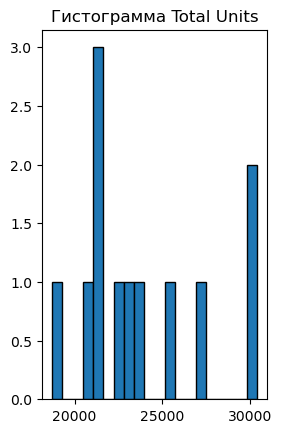

In [57]:
plt.subplot(1, 2, 1)
plt.hist(total_units, bins=20, edgecolor='black')
plt.title('Гистограмма Total Units')

Text(0.5, 1.0, 'Гистограмма Total Profit')

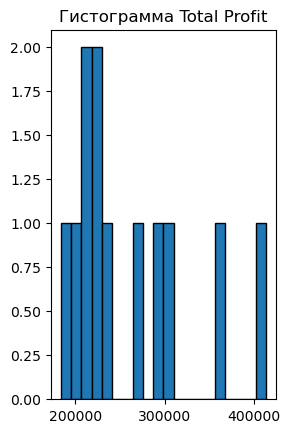

In [59]:
plt.subplot(1, 2, 2)
plt.hist(total_profit, bins=20, edgecolor='black')
plt.title('Гистограмма Total Profit')

In [61]:
# Если p-значение теста Шапиро-Уилка меньше 0.05, то распределение не нормальное. 
# Гистограммы и Q-Q графики также помогут визуально оценить нормальность. Если распределение симметрично и напоминает колокол, это может свидетельствовать о нормальности.

In [63]:
# Проверка на нормальность с использованием p-значений
alpha = 0.05
if shapiro_units.pvalue > alpha and shapiro_profit.pvalue > alpha:
    # Используем двувыборочный t-тест
    t_stat, p_value = stats.ttest_ind(total_units, total_profit)
    test_type = 't-тест'
else:
    # Используем тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(total_units, total_profit)
    test_type = 'тест Манна-Уитни'

print(f'Результат {test_type}, p-значение: {p_value}')

Результат t-тест, p-значение: 6.589120161957625e-11


In [65]:
# В зависимости от p-значений для каждой группы, выбирается между двувыборочным t-тестом или тестом Манна-Уитни для проверки гипотезы о равенстве математических ожиданий.

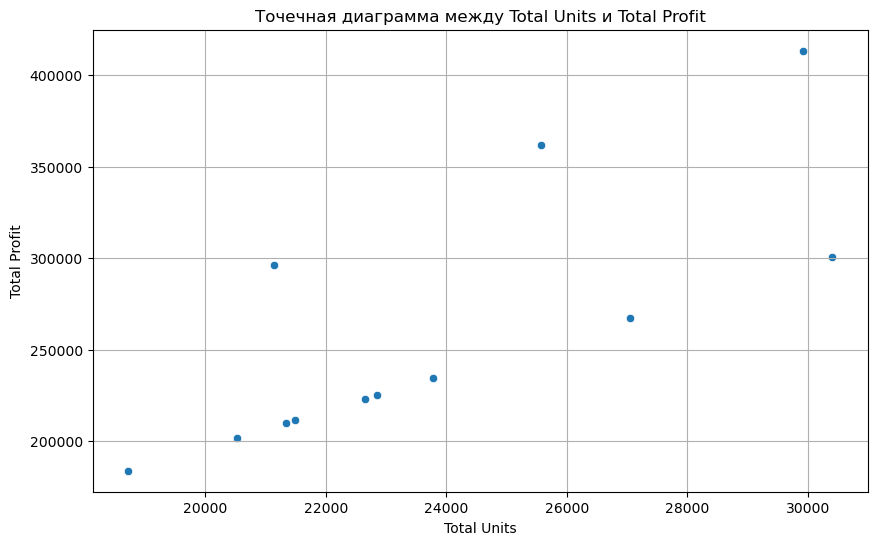

In [67]:
# Строим точечную диаграмму
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Units', y='Total Profit', data=cleaned_sales)
plt.title('Точечная диаграмма между Total Units и Total Profit')
plt.xlabel('Total Units')
plt.ylabel('Total Profit')
plt.grid()
plt.show()

In [69]:
# Оцениваем корреляцию
correlation = cleaned_sales['Total Units'].corr(cleaned_sales['Total Profit'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.7680890631902555


In [71]:
# Получаем точечную диаграмму, которая поможет визуализировать взаимосвязь между Total Units и Total Profit. 
# Коэффициент корреляции указывает на степень линейной зависимости между этими переменными. Если коэффициент близок к 1 или -1, то имеется сильная корреляция; если близок к 0, корреляция слаба.

In [73]:
# Выбираем нужные переменные
X = cleaned_sales[['Total Units']]
y = cleaned_sales['Total Profit']

In [79]:
# Добавление константы для модели
X = sm.add_constant(X)

In [81]:
# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

In [83]:
# Вывод результатов модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     14.39
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00353
Time:                        10:04:54   Log-Likelihood:                -145.06
No. Observations:                  12   AIC:                             294.1
Df Residuals:                      10   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.392e+04   9.19e+04     -0.913      

/usr/local/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [85]:
# Прогнозирование
predictions = model.predict(X)

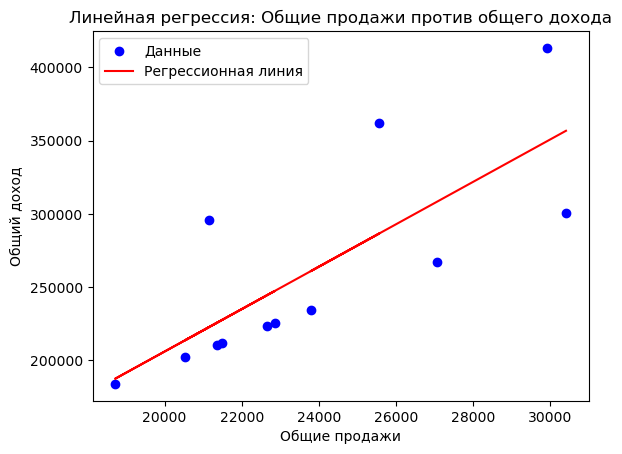

In [89]:
# Визуализация
plt.scatter(cleaned_sales['Total Units'], cleaned_sales['Total Profit'], color='blue', label='Данные')
plt.plot(cleaned_sales['Total Units'], predictions, color='red', label='Регрессионная линия')
plt.title('Линейная регрессия: Общие продажи против общего дохода')
plt.xlabel('Общие продажи')
plt.ylabel('Общий доход')
plt.legend()
plt.show()

In [ ]:
# Вывод: Модель показывает значительную связь между общими продажами и общим доходом, позволяя делать прогнозы о доходах на основе объема продаж.